In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- - -

    1. Los coeficientes de Fourier cn de dos ciclos de una señal periódica 𝑓(𝑛) de período 5Hz que fue muestreada a 100 Hz están almacenados en el archivo “espectro.txt”. 

    (a) Representa gráficamente el espectro de la señal (módulo y fase) versus frecuencias en Hz. 

    (b) Encuentra y grafica 𝑓(𝑛). 

    (c) Encuentra y grafica 𝑓(𝑡) versus 𝑡/𝑠𝑒𝑔. 

### Apartado A

In [11]:
espectro = np.loadtxt('espectro.txt',dtype="complex")
espectro.shape

(40,)

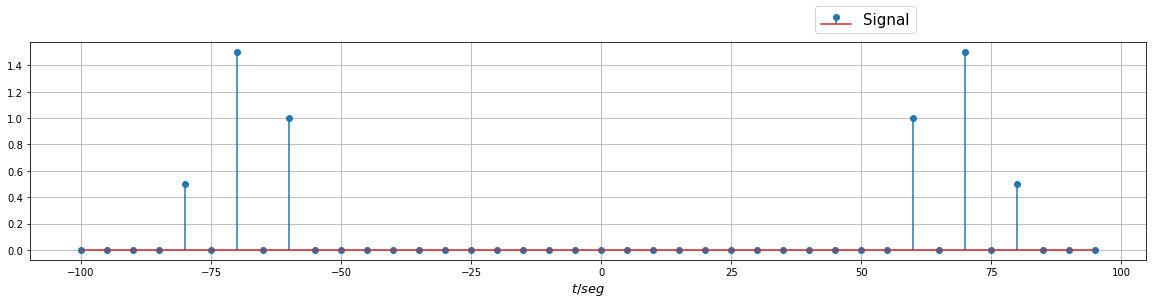

In [12]:
Fs = 100
F = 5
N = len (espectro)
n = np.arange (N)


plt.figure(figsize=(20,4))
plt.stem((n-20)*F,abs(espectro))
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('Signal',"EMG"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

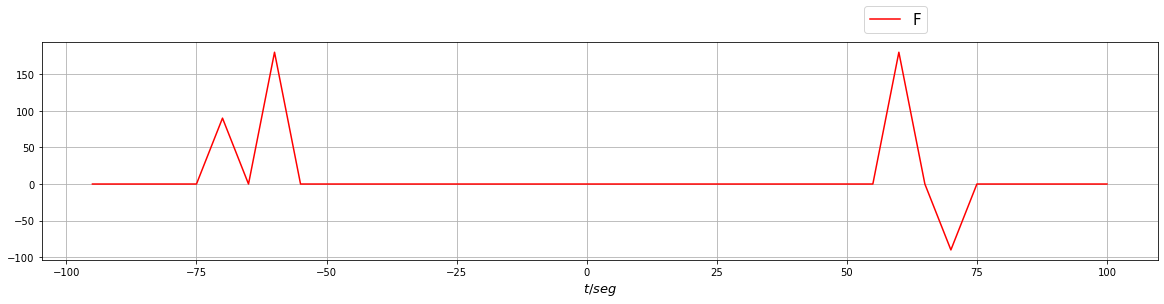

In [13]:
plt.figure(figsize=(20,4))
plt.plot((20-n)*F,np.angle(espectro)*180/np.pi,color='r')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(("Fase"),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

### Apartado B y C

In [16]:
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FReconstrucciondeseñalesapartirdemuestras import h

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb


<string>:10: ComplexWarning: Casting complex values to real discards the imaginary part
<string>:9: RuntimeWarning: invalid value encountered in cdouble_scalars
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


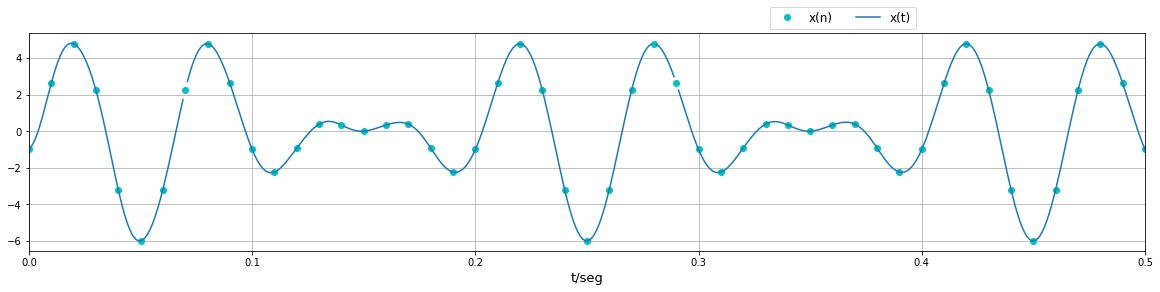

In [17]:
k = np.arange(0,10,dtype=complex)
c2 = espectro

n2 = np.arange(3*N)
xrec2 = np.zeros(len(n2),dtype=complex)
s2 = 0

for i in np.arange(0,N):
    s2 = s2 + c2[i] * np.exp(1j*2*np.pi*i*n2/N)
xrec2 = s2

w7 = h(2000,1000,xrec2,Fs) #Reconstruyo la señal analógica a partir de sus muestras
#x7 es el vector de las muestras
t7 = np.arange(len(w7))/1000

plt.figure(figsize=(20,4))
plt.plot(n2/Fs,xrec2,"oc")
plt.plot(t7,w7)
plt.xlabel('t/seg', fontsize=13)
plt.legend(('x(n)','x(t)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=4)
plt.xlim(0,0.5)
plt.grid(True)
plt.show()

- - -

    2. El teorema de convolución establece que si 𝑋(𝜔) e 𝑌(𝜔) son los respectivos espectros de las señales 𝑥(𝑛) e 𝑦(𝑛), entonces el espectro de 𝑥(𝑛) * 𝑦(𝑛) es 𝑋(𝜔)𝑌(𝜔). Muestra el teorema de la convolución empleando las señales 𝑥(𝑛) = 𝑖𝑓(|𝑛| ≤ 1, 1, 0) y 
    𝑦(𝑛) = 𝑖𝑓 (𝑛 = 5̇,1,0). 
    Nota: 5̇ = múltiplo de 5. 
    Sugerencia. Tomar n, al menos, en [-50, 50]. 

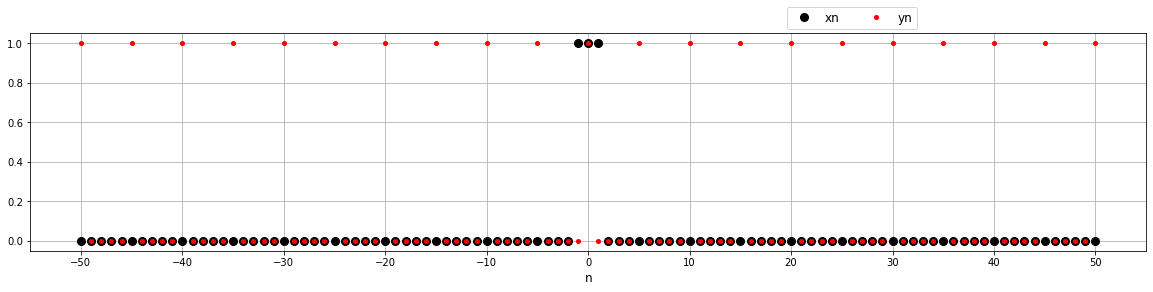

In [101]:
n2 = np.arange (-50,51)

xn = np.piecewise (n2, [ (abs(n2) <= 1)  ] , [ lambda n2: 1, lambda n2: 0 ])
yn = np.piecewise (n2, [n2%5 == 0] , [ lambda n2: 1, lambda n2: 0 ])


plt.figure(figsize=(20,4))
plt.plot(n2,xn,'ko',ms=8)
plt.plot(n2,yn,'o',color="red",ms=4)
plt.grid (True)
plt.xlabel('n',fontsize=12)
plt.legend(('xn','yn'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks (np.arange (-50,60,10))
plt.show()

In [102]:
y = np.convolve(xn, yn) # Calculamos la convolución
ny0 = xn[0] + yn[0] #La convolución empieza en la suma de los comienzos
Ny = len(xn) + len(yn) - 1 #Suma de longitudes - 1: Número de elementos del vector
ny = np.arange(ny0, ny0+Ny)

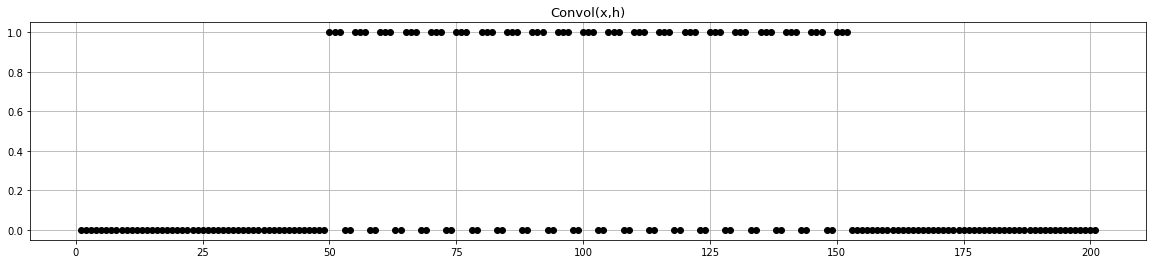

In [114]:
plt.figure(figsize=(20,4))
plt.plot(ny,y,"ok")
plt.title('Convol(x,h)',fontsize=13)
plt.grid(True)
plt.show()

In [110]:
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont

importing Jupyter notebook from FTransformaciones_tf_de_una_señal_no_periodica.ipynb


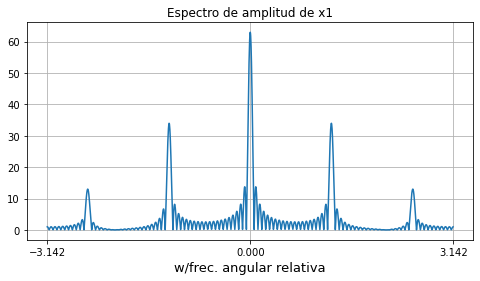

In [111]:
espec1 = EspecCont(n2/100,xn,100)
espec2 = EspecCont(n2/100,yn,100)
plt.figure(figsize=(8,4))
plt.plot(espec1[:,0],abs(espec1[:,1]*espec2[:,1]))
plt.xticks([-np.pi,0,np.pi])
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

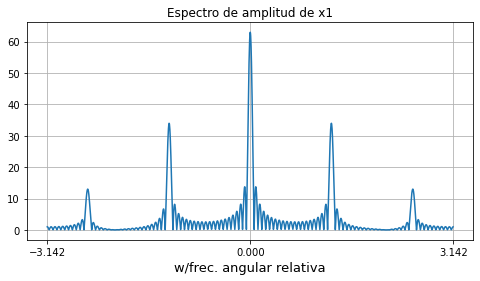

In [112]:
especy = EspecCont(ny/100,y,100)
plt.figure(figsize=(8,4))
plt.plot(especy[:,0],abs(especy[:,1]))
plt.xticks([-np.pi,0,np.pi])
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

##### Esto quiere decir que la multiplicación de los espectros de las señales x(n) e y(n) [espect(xn)*espect(yn)] da lo mismo que el espectro de la convolución entre x(n) e y(n) [espect (convolve(xn,yn))].

- - -

    3. La señal del archivo emg_DP.xlsx, muestreada a 2kHz, corresponde al registro de EMG del músculo deltoides posterior, durante un movimiento de abducción-aducción durante un poco más de 48s. Con segmentos de 700 ms de longitud: 

    (a) Construye 5 pdf elegidas aleatoriamente y compara una de ellas con ajustes de 4 distribuciones continuas paramétricas (normal, de cauchy, logística y gamma). Emplea como criterio de comparación el valor de la suma de los cuadrados de los desvíos. Construye una tabla con todos los ajustes realizados, en sentido creciente de SSE, agregando el valor óptimo de los parámetros de cada una de las distribuciones continuas. 

    (b) Compara las 5 pdf entre si empleando al menos dos de las métricas estudiadas. Indica el criterio que utilizas para decidir si la señal es estacionaria con segmentos de 700 ms. 

### Apartado A

In [1]:
import bioread

In [2]:
EMG = bioread.read_file ("EMG.acq")

In [3]:
EMG.channels

[Channel EMG (30 - 500 Hz): 62489 samples, 2000.0 samples/sec, loaded: True]

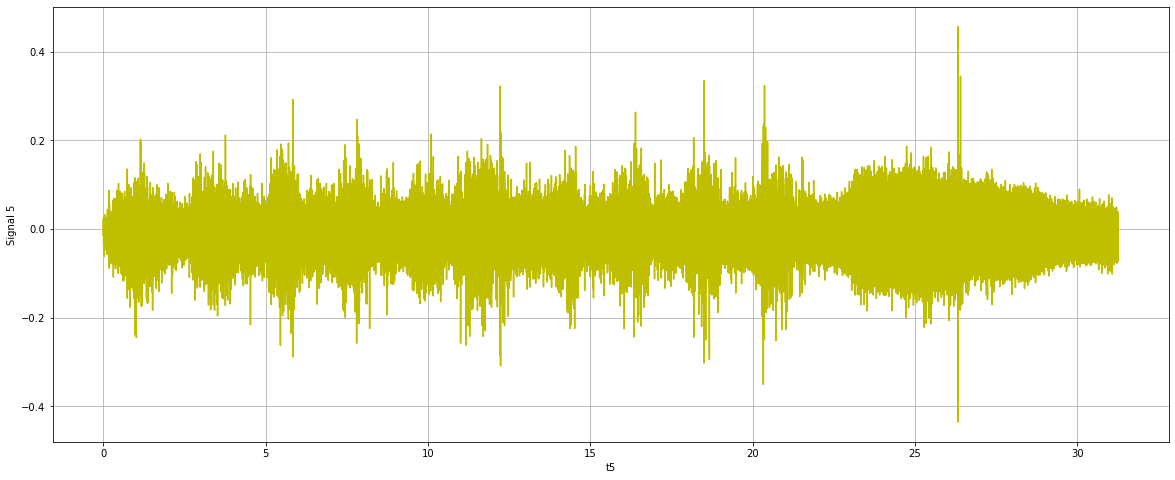

In [8]:
tiempo = EMG.time_index
s = EMG.channels[0].data

plt.figure (figsize =(20,8))
plt.plot (tiempo,s,color="y")
plt.xlabel ("t5")
plt.ylabel ("Signal 5")
plt.grid (True)
plt.show ()

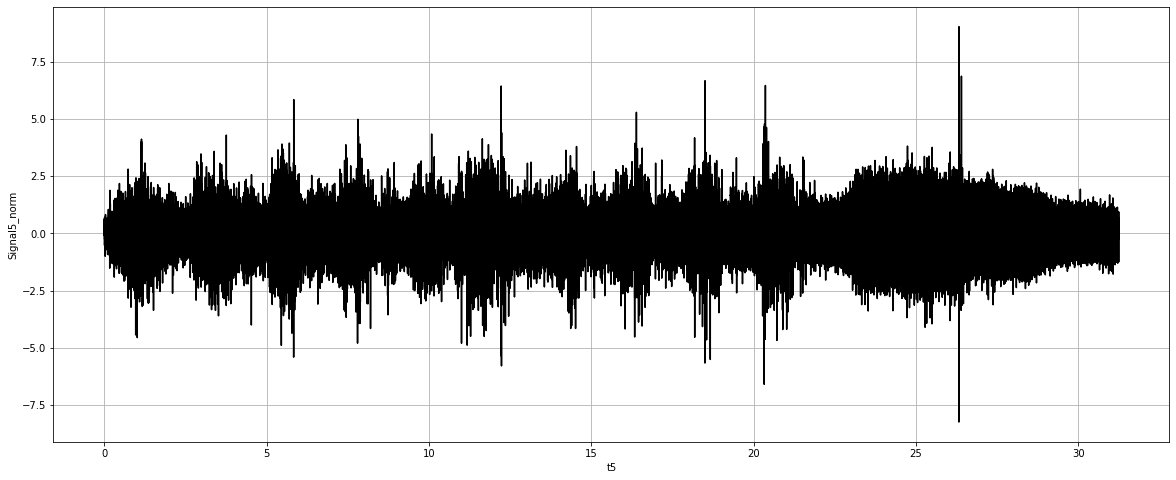

In [13]:
s_norm = (s - np.mean (s)) / (np.std (s))


plt.figure (figsize =(20,8))
plt.plot (tiempo,s_norm,color="black")
plt.xlabel ("t5")
plt.ylabel ("Signal5_norm")
plt.grid (True)
plt.show ()

In [15]:
Fs = 2000
seg = int (Fs*(700*10**(-3)))
print (seg)


print (f"La cantidad de columnas correspondientes será: {len(s_norm)/seg}")

1400
La cantidad de columnas correspondientes será: 44.635


In [17]:
import import_ipynb
from FEstimaciondeunafdp_new1 import pdf_new1

importing Jupyter notebook from FEstimaciondeunafdp_new1.ipynb


In [23]:
bigp = np.empty(0) #Matriz vacía en la que vamos a agregar los datos con lo que vamos a construir los pdf.
#Por cada longitud de segmento tenemos una matriz y cada una de ellas, vamos a elegir 10 filas.

bigY = np.empty(0,dtype=float)

dat = s_norm

Ndat = len(dat)

x0, xf, Np = -9, 9, 24000
d = (xf-x0)/Np #Vector de paso.
x = x0 + d*np.arange(Np)



datos = np.empty((int(seg),0)) #Genero una matriz donde guardaré los datos.
m = Ndat//seg #Cuántas columnas tendrá para cada caso, division: // = N° entero
aux = np.reshape(dat[0:seg*m],(int(seg),int(m)),order= 'F')
datos = np.append(datos, aux, axis=1) #Datos para cada longitud de segmento.
#Ya inserte los datos para cada longitud de segmento, que se van agregando en forma de columnas.
#Debo construir las fdp con la misma cantidad de datos.
#Eleccion aleatoria. Hemos dicho q ibamos a tomar el peor de los casos: 764 columnas .
mi = np.random.choice(int(m),44,replace=False) #Elige aleatoriamente 818 numeros con las columnas que se va a quedar. Esto ya que dividimos en 100 segmentos.
#Replace=false para que no se repitan los datos.
datos = datos[:,mi] #Nos quedamos con todas las filas y las columnas mi.
#Hemos creado de nuevo la matriz pero más pequeña y todas las pdf se construiran con la misma cantidad de datos.
r = np.random.choice(seg,5,replace=False) #Elijo las 10 filas aleatoriamente.
p = datos[r,:]
bigp = np.append(bigp, p)
    
y1 = pdf_new1(p[0,:],x0,xf,Np,1); y2 = pdf_new1(p[1,:],x0,xf,Np,1) #1: nombre de la matriz, 2: lo que le agrego.
y3 = pdf_new1(p[2,:],x0,xf,Np,1); y4 = pdf_new1(p[3,:],x0,xf,Np,1) #1:los datos[fila,columnas],desde donde,hasta donde, cantidad de datos, valor que ajusta el ancho de banda.
y5 = pdf_new1(p[4,:],x0,xf,Np,1)

    #MATRIZ P DESDE DONDE SE CONSTRUYEN LAS FUNCIONES 
    #MATRIZ Y QUE JUNTA LAS FUNCIONES CONSTRUIDAS

Y = np.hstack((y1,y2,y3,y4,y5)) #Acumulo horizontalmente
bigY = np.append(bigY, Y)  

In [24]:
y = np.reshape(Y,(Np, 5), order='F')
y.shape #contiene de la última

(24000, 5)

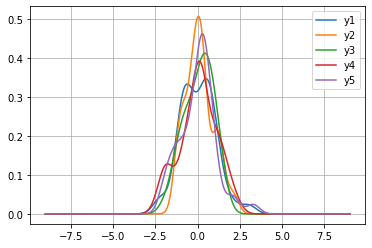

In [26]:
plt.plot(x,y)
plt.legend (("y1","y2","y3","y4","y5"))
plt.grid (True)
plt.show()

In [27]:
from scipy.stats import norm, cauchy, gamma, logistic
from fitter import Fitter

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00, 93.87it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,5.732282,425.814868,-82.106963,inf,0.077886,0.933331
gamma,5.732732,421.716764,-78.319321,inf,0.082992,0.897697
logistic,5.861544,430.902998,-81.125788,inf,0.083622,0.892755
cauchy,6.552188,452.430207,-76.224810,inf,0.116637,0.548400


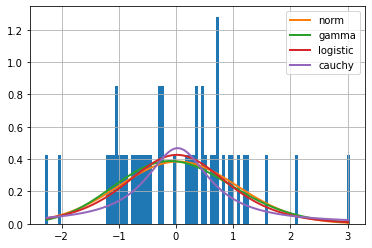

In [28]:
distribuciones = ['norm','cauchy','gamma',"logistic"]
fitter = Fitter(p[0,:],distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=4,plot=True)

In [32]:
c = fitter.fitted_param['cauchy']
l = fitter.fitted_param['logistic']
n = fitter.fitted_param['norm']
g = fitter.fitted_param['gamma']
print ("Cauchy: ",c)
print ("Logistic:", l)
print ("Normal: ", n)
print ("Gamma: ", g)

Cauchy:  (0.030620018858091118, 0.6798339358036702)
Logistic: (0.015504898839021217, 0.5862267884069124)
Normal:  (0.03545593921623813, 1.0356352989014492)
Gamma:  (60.535175758629535, -8.01402647708184, 0.13297198662448548)


In [48]:
x_cauchy = x
y_cauchy = cauchy.pdf(x_cauchy, c[0],c[1])

x_logistic = x
y_logistic = logistic.pdf(x_logistic, l[0],l[1])

x_norm = x
y_norm = norm.pdf(x_norm, n[0],n[1])

x_gamma = x
y_gamma = gamma.pdf(x_gamma, g[0],g[1],g[2])

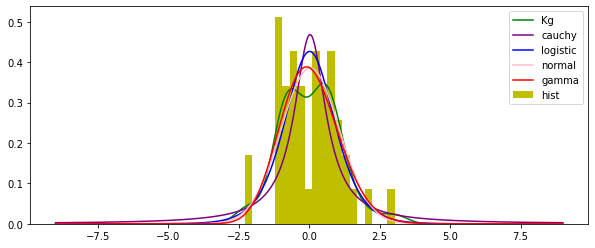

In [49]:
plt.figure (figsize =(10,4))
plt.plot(x,y1,'g')
plt.plot(x_cauchy,y_cauchy,'purple')
plt.plot(x_logistic,y_logistic,'blue')
plt.plot(x_norm,y_norm,'pink')
plt.plot(x_gamma,y_gamma,'red')
plt.hist(p[0,:],bins=20,density=True,color='y')
plt.legend(('Kg','cauchy',"logistic","normal","gamma",'hist'))
plt.show()

In [40]:
from FSum_of_square_error_SSE import sse

importing Jupyter notebook from FSum_of_square_error_SSE.ipynb


In [42]:
H = np.histogram(p[0,:],bins=40,density=True)
yH = H[0]; xH = H[1][:-1]

In [43]:
sse_kG = sse(xH,yH,x,y1)
sse_kG

1.022332880523569

In [44]:
sse_cauchy = sse(xH,yH,x_cauchy,y_cauchy)
sse_cauchy

1.420324045589213

In [45]:
sse_logistic = sse(xH,yH,x_logistic,y_logistic)
sse_logistic

1.1849435620300746

In [46]:
sse_norm = sse(xH,yH,x_norm,y_norm)
sse_norm

1.1469641903639816

In [47]:
sse_gamma = sse(xH,yH,x_gamma,y_gamma)
sse_gamma

3.2386554576637443

    DISTRIBUCIONES              SSE                                       PARÁMETROS
    KG                          1.022332880523569           
    NORMAL                      1.1469641903639816                      0.03545593921623813, 1.0356352989014492
    LOGISTIC                    1.1849435620300746                      0.015504898839021217, 0.5862267884069124
    CAUCHY                      1.420324045589213                       0.030620018858091118, 0.6798339358036702
    GAMMA                       3.2386554576637443                      60.535175758629535, -8.01402647708184, 0.13297198662448548

### Apartado B

importing Jupyter notebook from FOverlapping_Index.ipynb


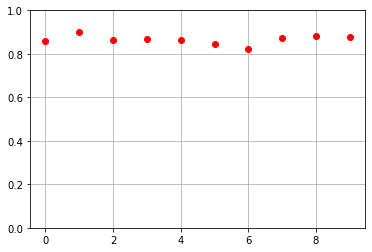

In [50]:
#MÉTODO DEL ÍNDICE DE SOLAPAMIENTO

from FOverlapping_Index import area

Area = np.empty (0)
for i in range (0,5): #porque son 5 pdf.
    for j in range (i+1,5):
        Area = np.append (Area, area (x,y[:,i],y[:,j]))

plt.plot (Area,"o",color="red")
plt.grid (True)
plt.ylim(0,1)
plt.show ()

##### Como la dispersión se encuentra próxima a 1, se puede considerar que las señales son parecidas.

##### Podemos decir que la señal es estacionaria por encima de los 700ms.

importing Jupyter notebook from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1.ipynb


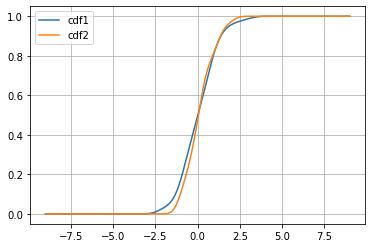

In [52]:
# MÉTODO DE LA DISTANCIA DE WASSERSTEIN

from FCalculo_de_la_cdf_a_partir_de_la_pdf_Version1 import cdf
from scipy.stats import wasserstein_distance

cdf1 =  cdf (x,y1)
cdf2 =  cdf (x,y2)

plt.plot (x,cdf1)
plt.plot (x,cdf2)
plt.legend (("cdf1","cdf2"))
plt.grid (True)
plt.show()

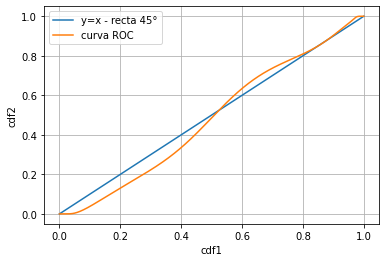

In [53]:
#CURVAS ROC

plt.plot(cdf1,cdf1) #línea de 45 grados
plt.plot(cdf1,cdf2)
plt.xlabel ("cdf1")
plt.ylabel ("cdf2")
plt.grid (True)
plt.legend (("y=x - recta 45°","curva ROC"))
plt.show()

In [54]:
from FAreabajolacurvaROC import AUC

AUC (cdf1,cdf2)

importing Jupyter notebook from FAreabajolacurvaROC.ipynb


0.5205409289239842

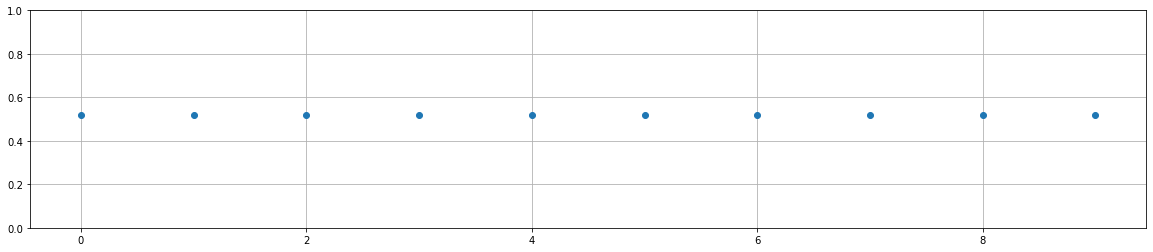

In [55]:
Area_AUC = np.empty(0)

for i in range (0,5):
    for j in range (i+1,5):
        Area_AUC = np.append (Area_AUC, AUC (cdf1,cdf2))


plt.figure(figsize=(20,4))
plt.plot(Area_AUC,'o')
plt.grid (True)
plt.ylim (0,1)
plt.show()

##### Por lo que podemos deducir que mientras más se parezcan cdf1 y cdf2, más próxima a 1/2 será el área bajo la curva ROC. En este caso el área bajo las curvas ROC es de 0.5205409289239842, lo cual indican que las señales son bastante similares.

In [57]:
wasserstein_distance(y1,y2,cdf1,cdf2)

0.013317387550247263

##### En este criterio se observa que tan cercano a cero nos da la distancia de Wassertein. Este valor dió 0.013317387550247263, esto nos indica que necesita "menor movimiento de tierra" para que las señales sean similares. Por lo tanto podemos decir que son practicamente las mismas. Finalmente la señal es estacionaria para segmentos de 700ms.

- - -